Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score

In [2]:
df = pd.read_csv('Clinic_data.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df['age'] = df['age'].astype(int)

EDA

/var/folders/g8/09383sds4_1bldj65ms2wh9m0000gn/T/ipykernel_4597/2963574690.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='DEATH_EVENT',palette='Set2')


([<matplotlib.axis.XTick at 0x15962f460>,
 [Text(0, 0, 'Survived'), Text(1, 0, 'Deceased')])

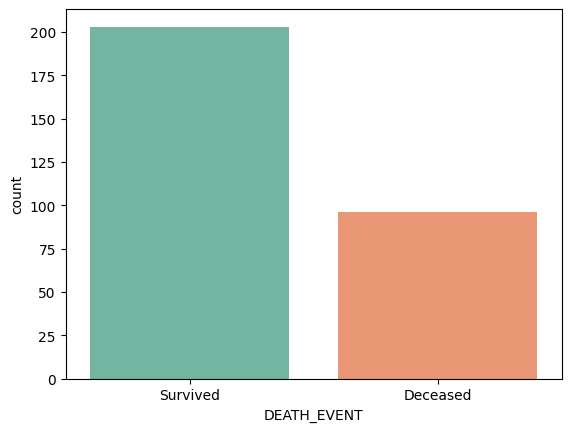

In [7]:
# Checking balance of Target Values

sns.countplot(data=df,x='DEATH_EVENT',palette='Set2')
plt.xticks([0,1],['Survived','Deceased'])

<Axes: >

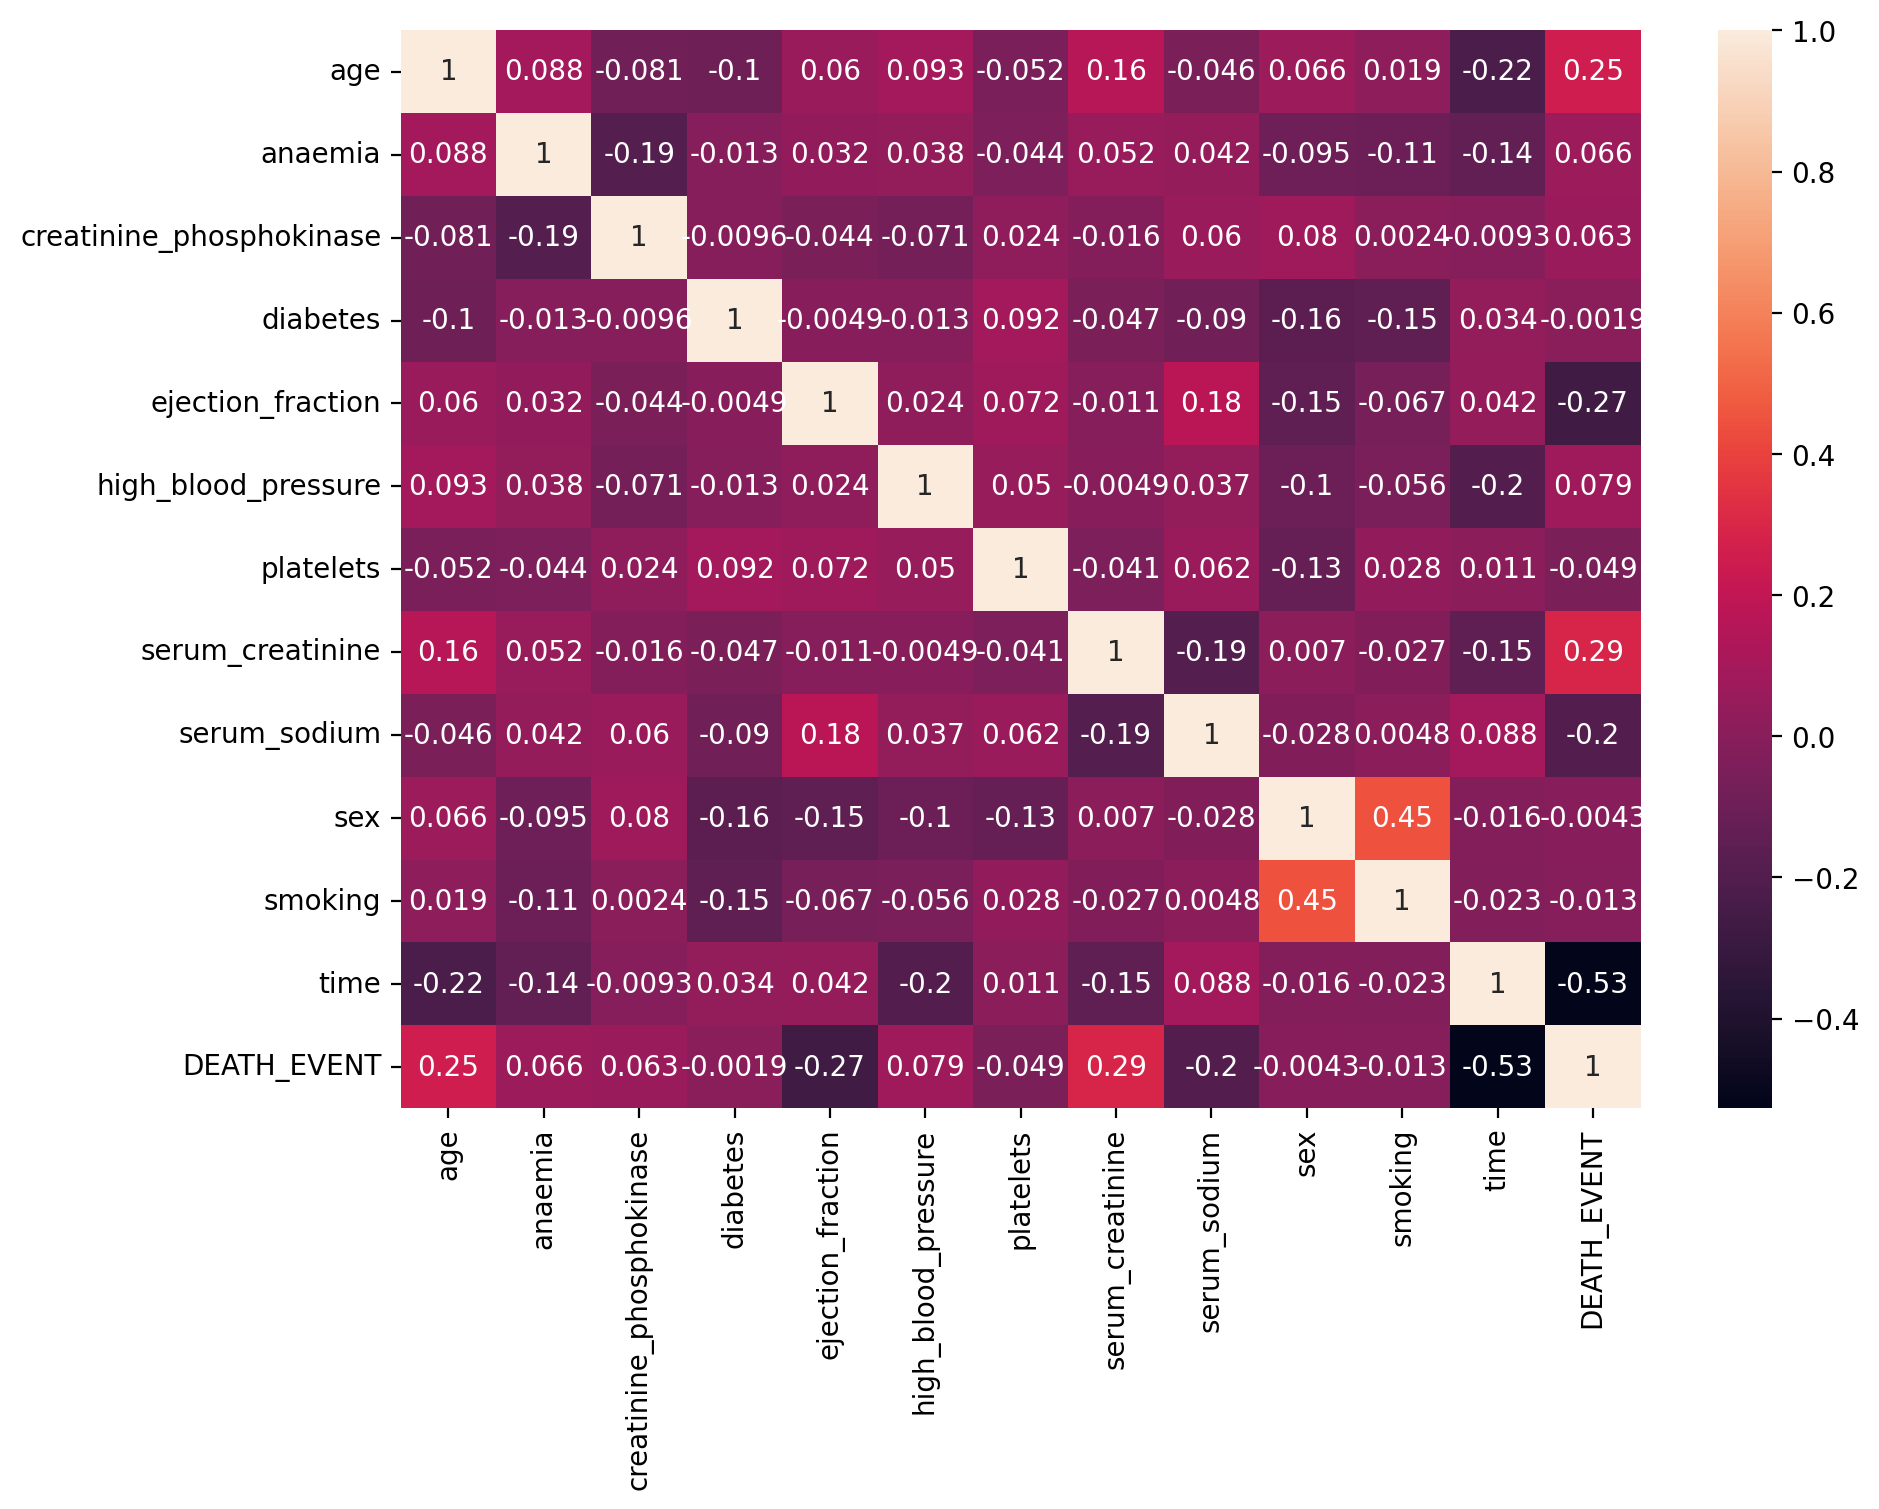

In [8]:
# Correlation of the features

plt.figure(figsize=(10,7),dpi=200)
sns.heatmap(df.corr(),annot=True)

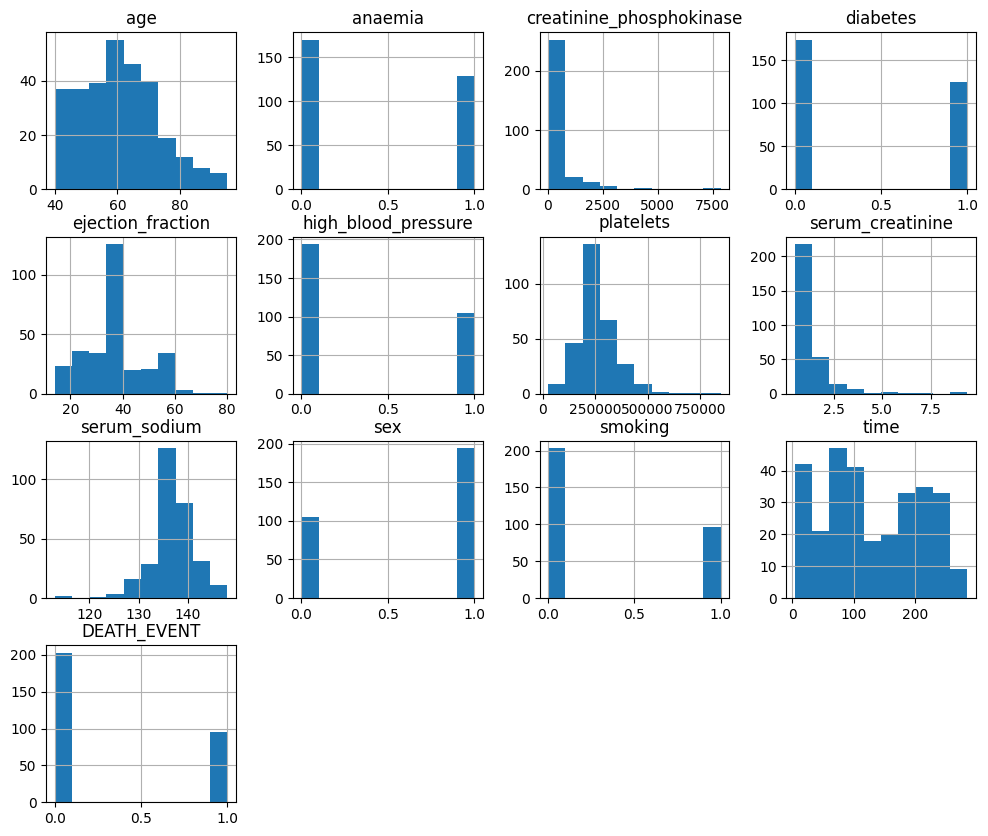

In [9]:
df.hist(figsize=(12,10))
plt.show()

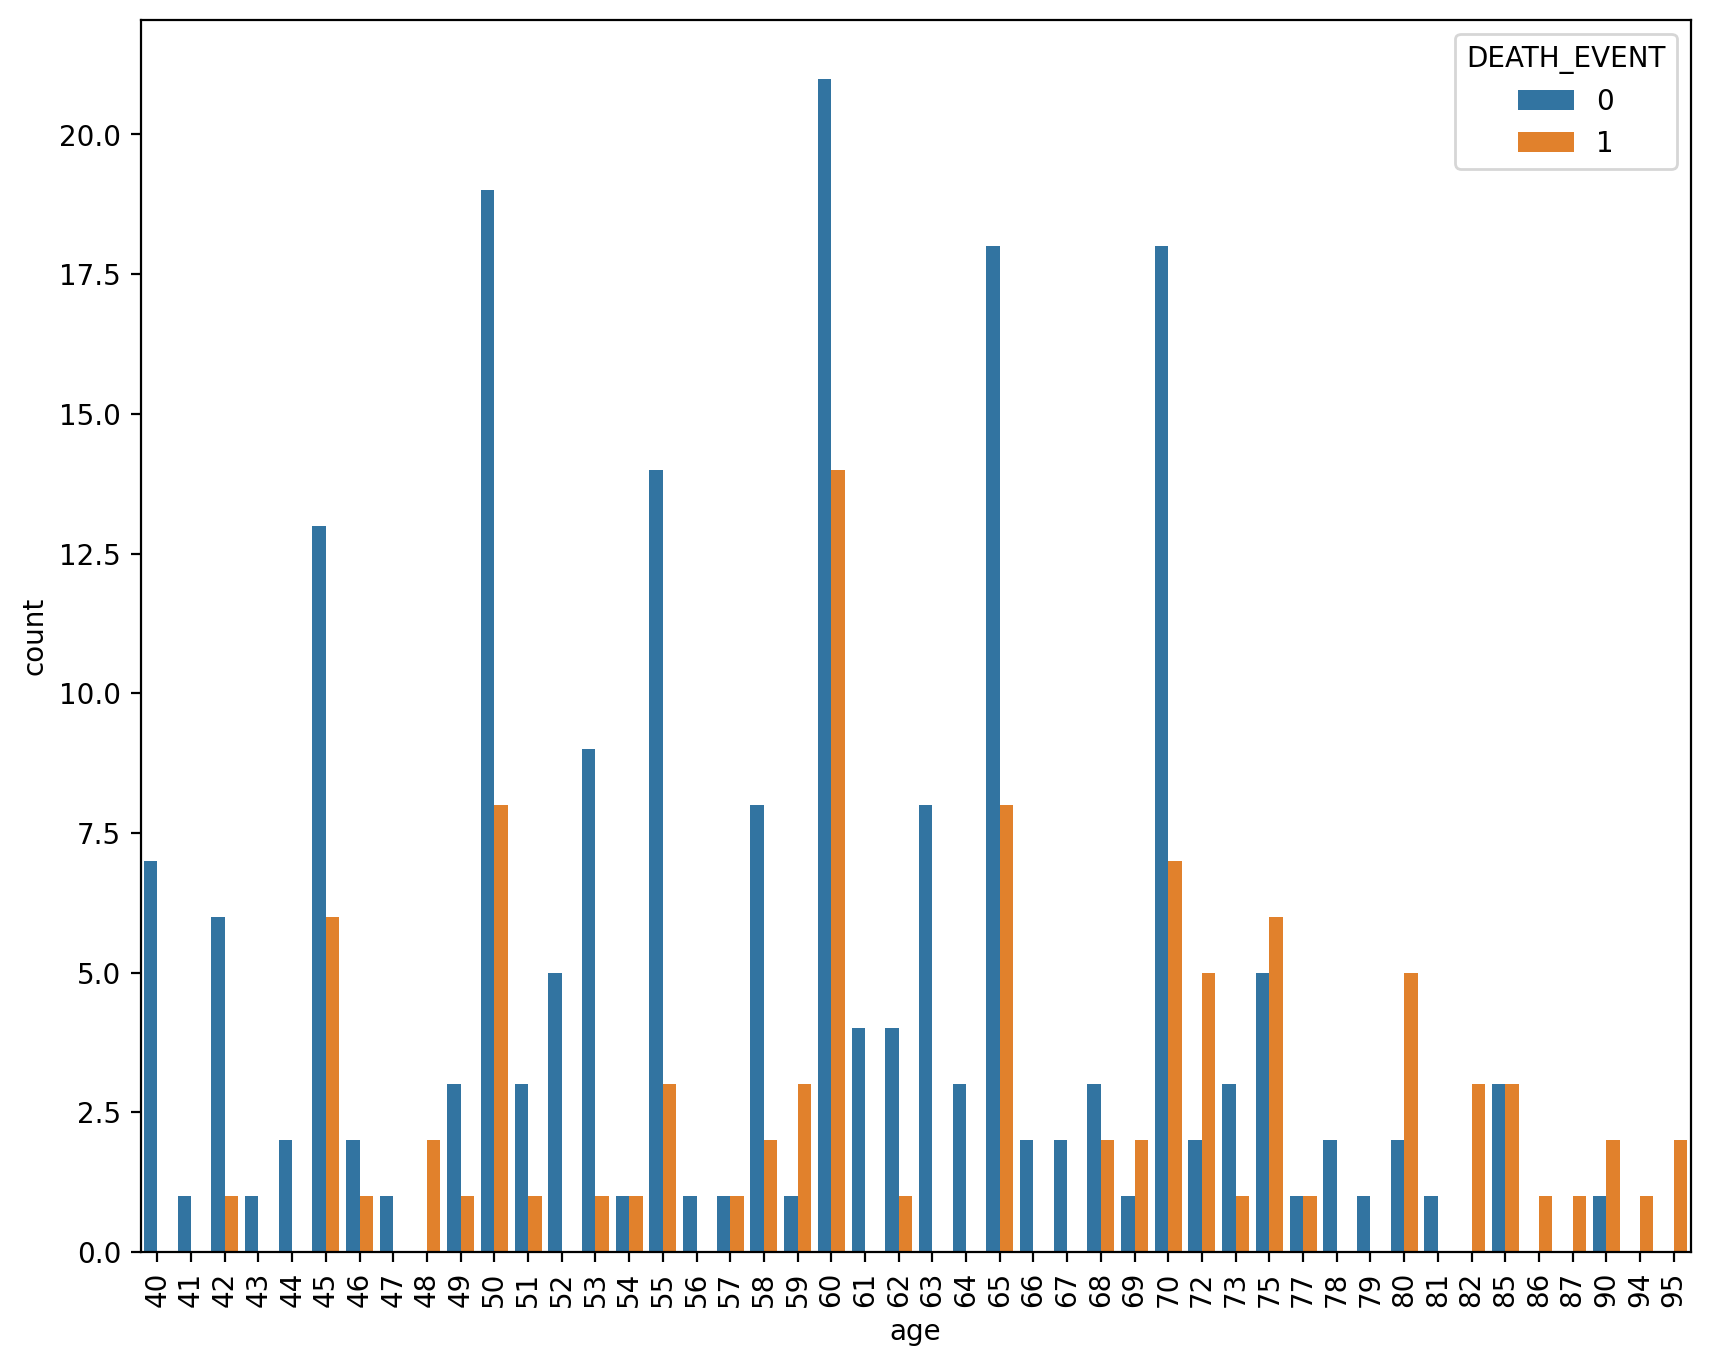

In [10]:
# Age distribution according to Death event

plt.figure(figsize=(10,8),dpi=200)
sns.countplot(data=df,x='age',hue='DEATH_EVENT')
plt.xticks(rotation=90);

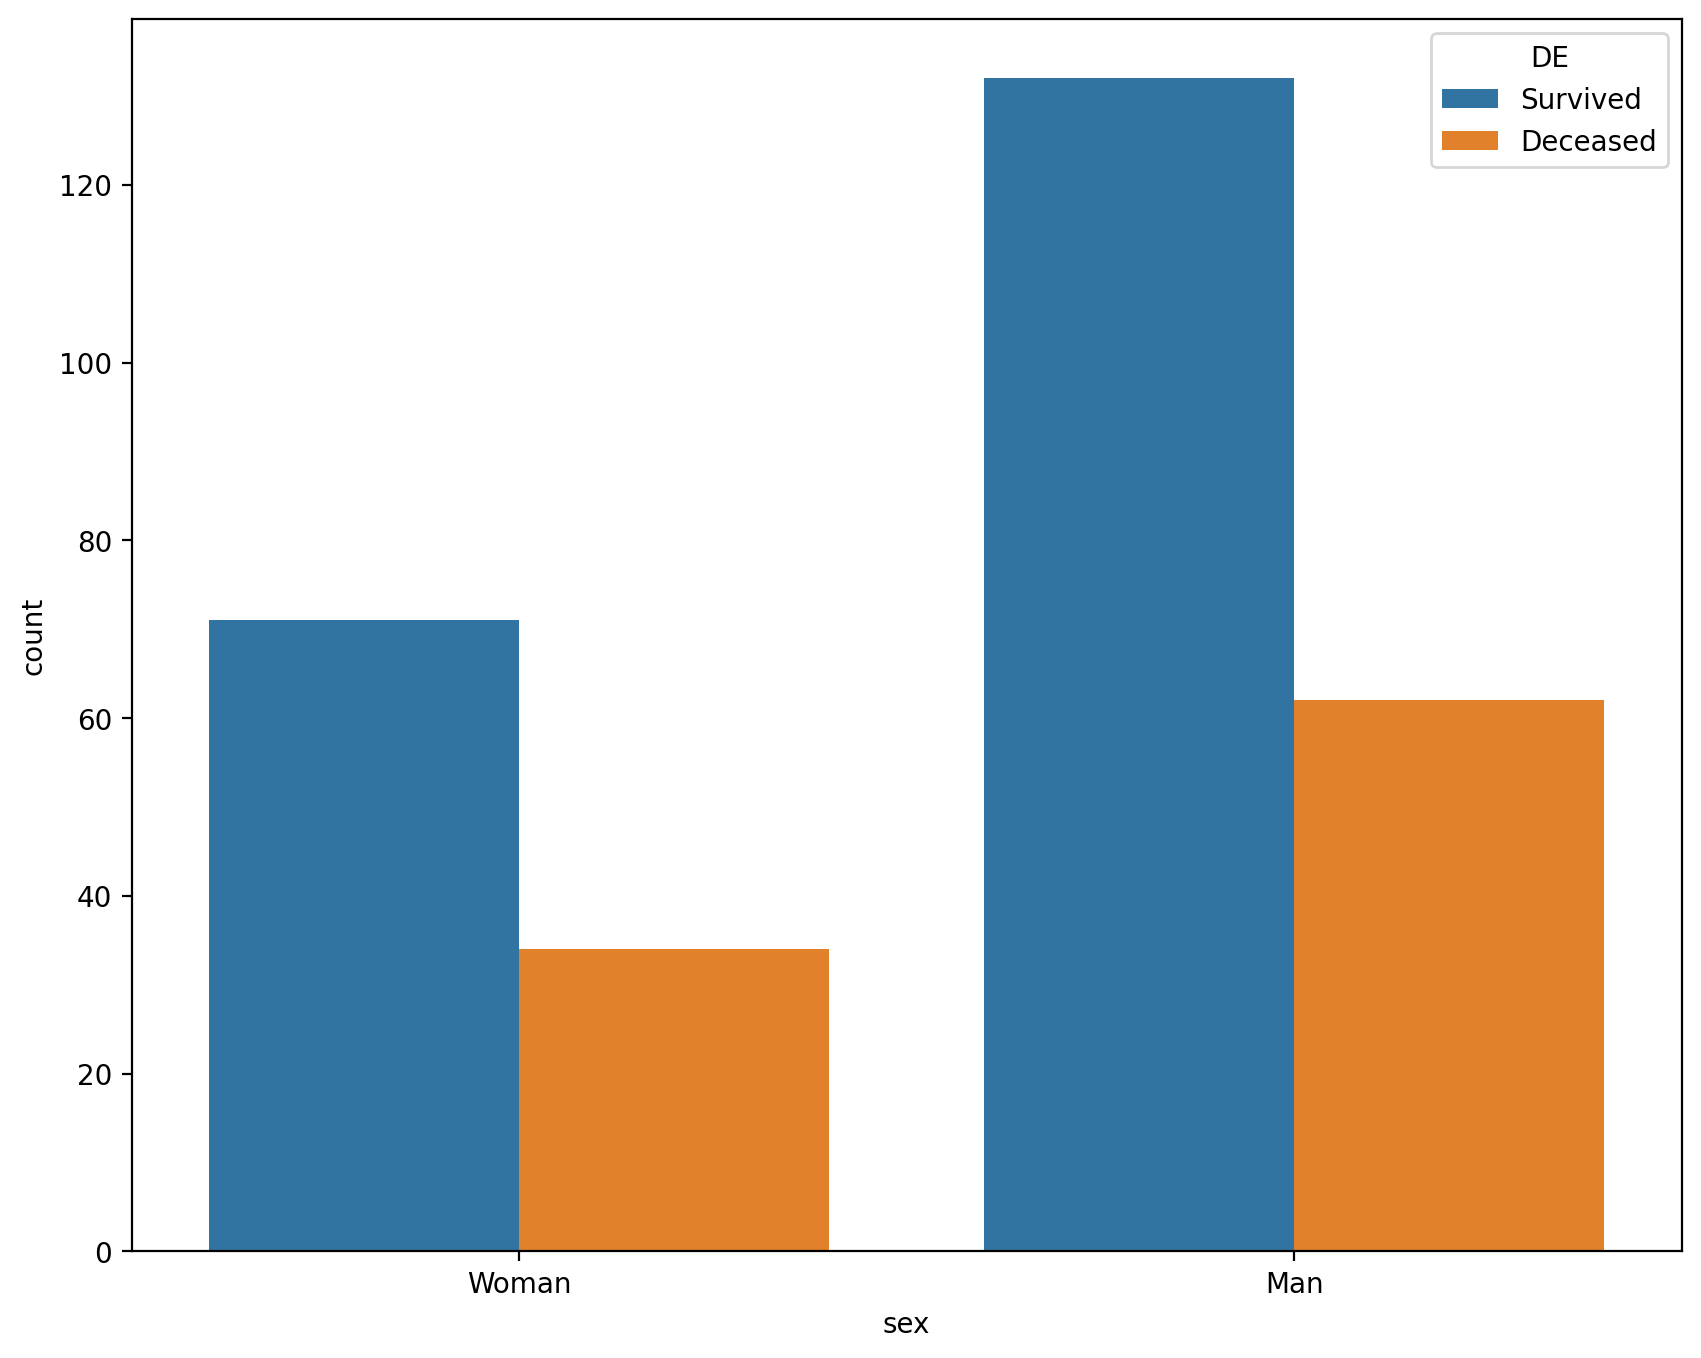

In [11]:
# Death Event by Gender

plt.figure(figsize=(10,8),dpi=200)
sns.countplot(data=df,x='sex',hue='DEATH_EVENT')
plt.xticks([0,1],['Woman','Man'])
plt.legend(title='DE', labels=['Survived', 'Deceased']);

In [12]:
corr = df.corr()['DEATH_EVENT'].sort_values(ascending=False)[1:]

corr

serum_creatinine            0.294278
age                         0.253581
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

/var/folders/g8/09383sds4_1bldj65ms2wh9m0000gn/T/ipykernel_4597/1295265144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, orient='h',palette='Set2')


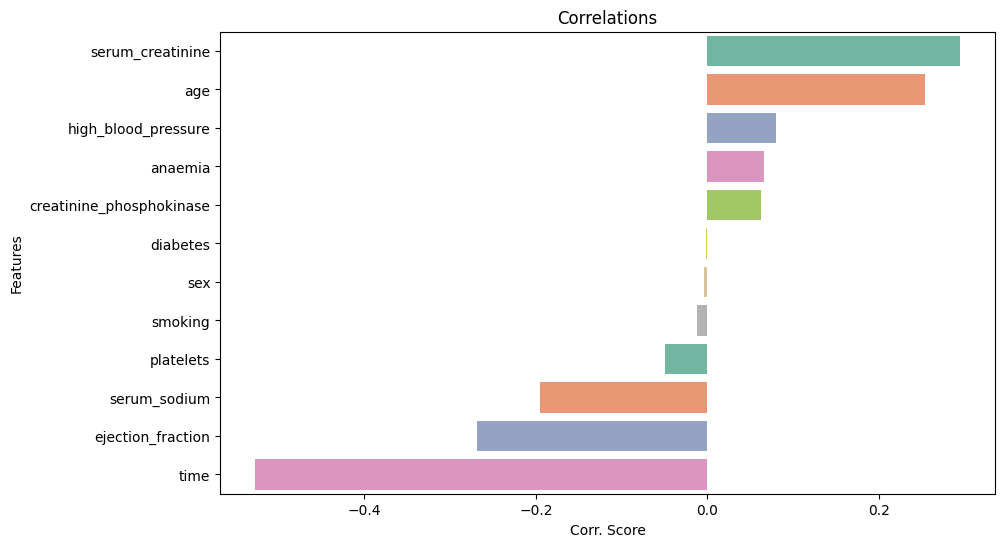

In [13]:
# Plotting Features importance

plt.figure(figsize=(10, 6))
sns.barplot(x=corr.values, y=corr.index, orient='h',palette='Set2')

plt.title('Correlations')
plt.xlabel('Corr. Score')
plt.ylabel('Features');

/var/folders/g8/09383sds4_1bldj65ms2wh9m0000gn/T/ipykernel_4597/3851246585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data = df['platelets'],palette = colours)
/var/folders/g8/09383sds4_1bldj65ms2wh9m0000gn/T/ipykernel_4597/3851246585.py:3: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.boxenplot(data = df['platelets'],palette = colours)


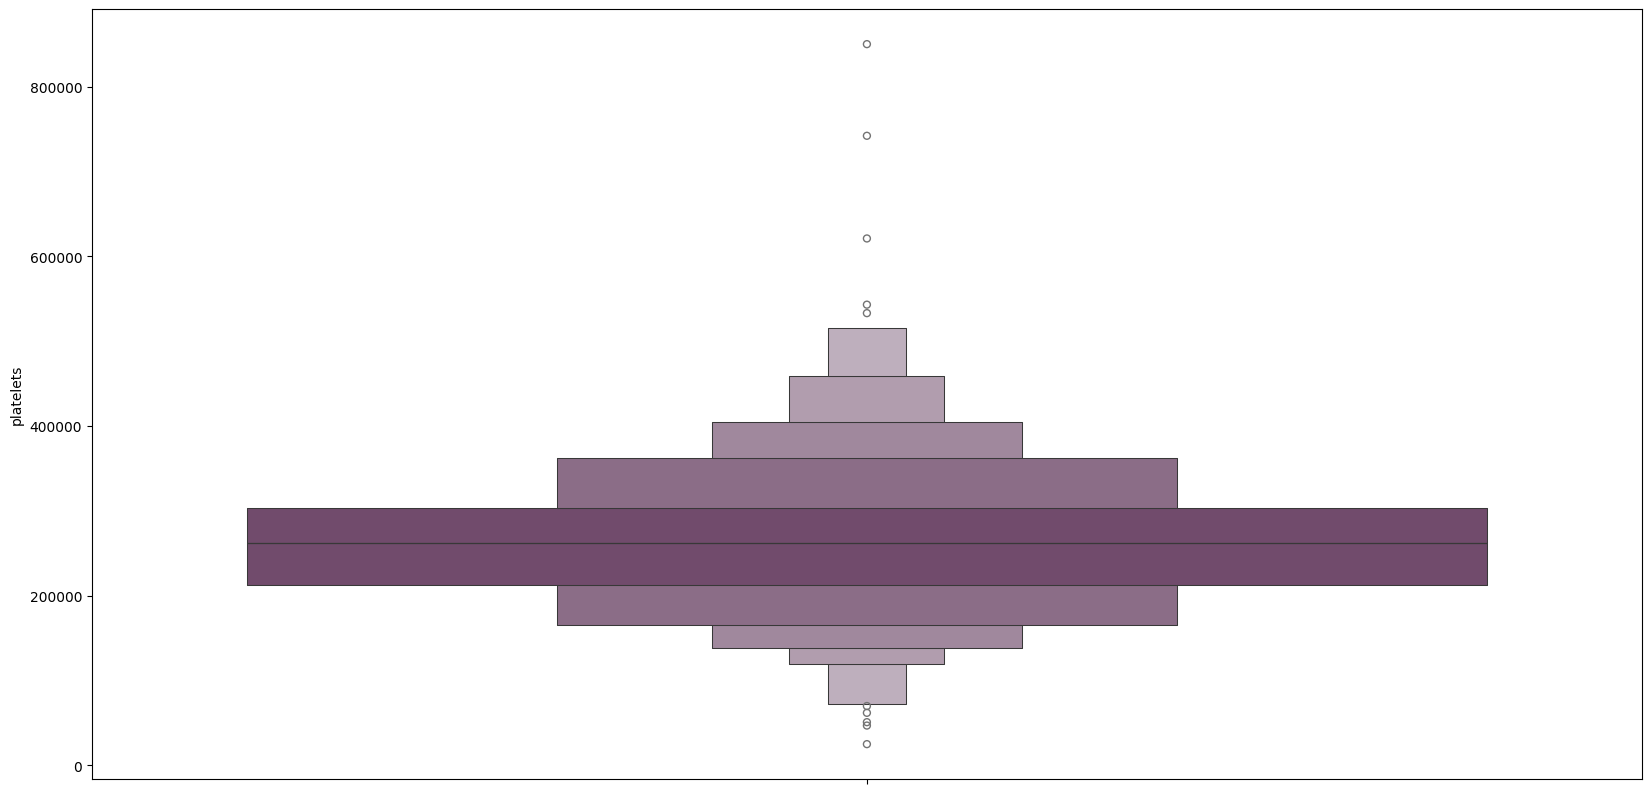

In [14]:
colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = df['platelets'],palette = colours)
plt.xticks(rotation=90)
plt.show()

/var/folders/g8/09383sds4_1bldj65ms2wh9m0000gn/T/ipykernel_4597/1097065401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data = df['serum_creatinine'],palette = colours)
/var/folders/g8/09383sds4_1bldj65ms2wh9m0000gn/T/ipykernel_4597/1097065401.py:3: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.boxenplot(data = df['serum_creatinine'],palette = colours)


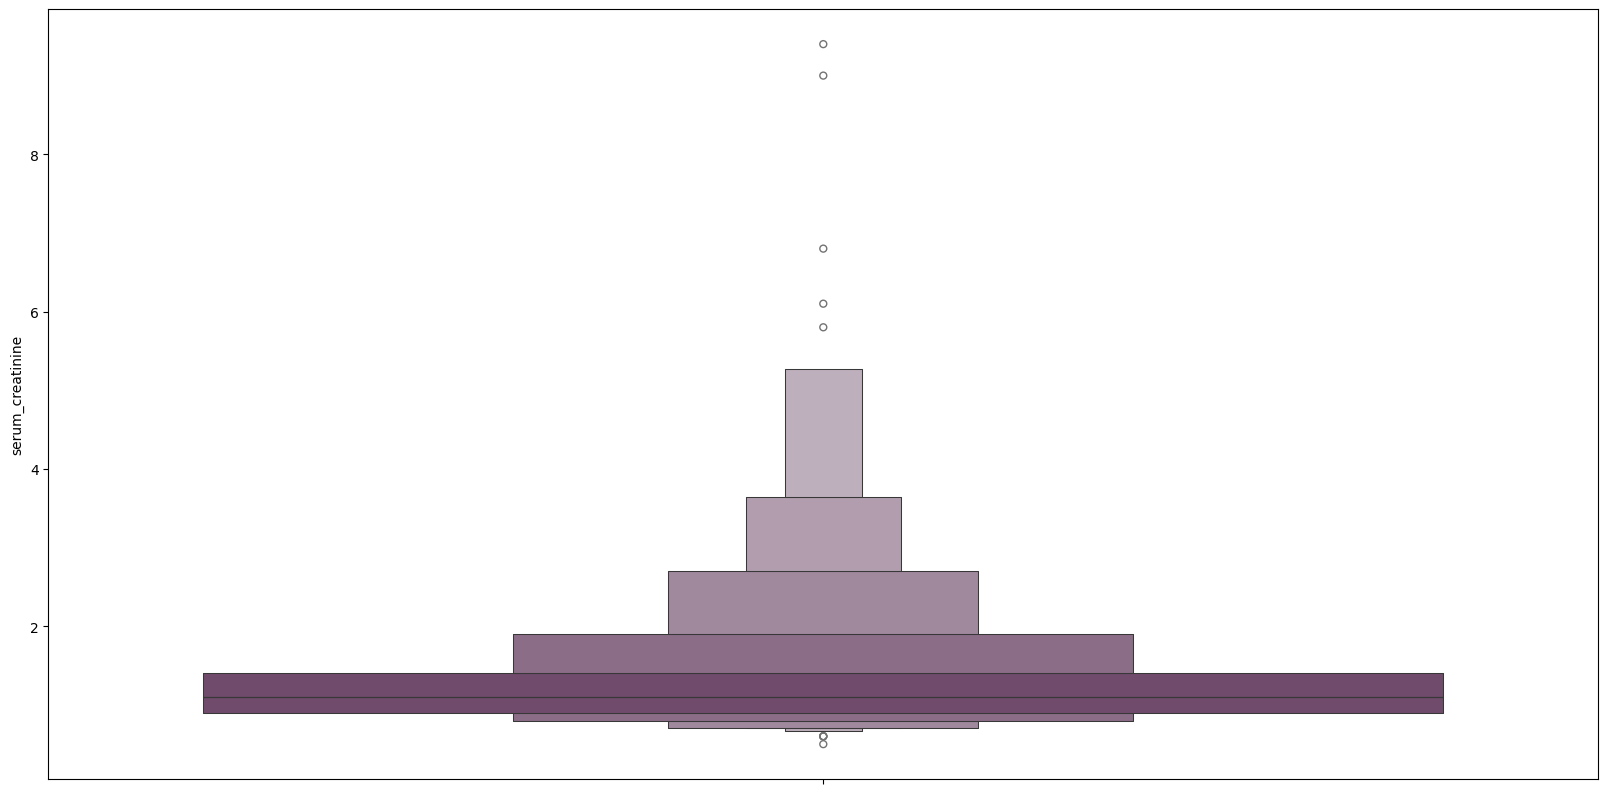

In [15]:
colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = df['serum_creatinine'],palette = colours)
plt.xticks(rotation=90)
plt.show()

In [16]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [17]:
# Re-organising columns to split 

df=df[['anaemia', 'diabetes', 'high_blood_pressure', 
        'sex', 'smoking','age','creatinine_phosphokinase',
       'ejection_fraction','platelets','serum_creatinine', 'serum_sodium','time',
       'DEATH_EVENT']]

In [18]:
df.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,0,0,1,1,0,75,582,20,265000.00,1.9,130,4,1
1,0,0,0,1,0,55,7861,38,263358.03,1.1,136,6,1
2,0,0,0,1,1,65,146,20,162000.00,1.3,129,7,1
3,1,0,0,1,0,50,111,20,210000.00,1.9,137,7,1
4,1,1,0,0,0,65,160,20,327000.00,2.7,116,8,1


SCALING-TEST/TRAIN SPLIT

In [19]:
# Test/Train Split

X = df.iloc[:, :-1] 
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.25, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# Scaling continuous features without touching binary classes

scaler = StandardScaler()

X_train.iloc[:,4:] = scaler.fit_transform(X_train.iloc[:, 4:])
X_test.iloc[:, 4:] = scaler.transform(X_test.iloc[:,4:])

In [22]:
X_train.shape

(224, 12)

In [23]:
# Building models to see performances 


from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    SVC()  
]

model_results = {}

for model in models:

    cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    
    mean_cv_score = round(cross_val_scores.mean() * 100, 2)
    
    model.fit(X_train, y_train)
    
    test_acc = round(model.score(X_test, y_test) * 100, 2)
    
    model_results[model] = {
        'cross_val_score': mean_cv_score,
        'test_accuracy': test_acc
    }

for model, results in model_results.items():
    print(f"{model} - Cross-Validation Score: {results['cross_val_score']}, Test Score: {results['test_accuracy']}")
    print()

RandomForestClassifier() - Cross-Validation Score: 87.53, Test Score: 74.67

LogisticRegression() - Cross-Validation Score: 84.79, Test Score: 77.33

KNeighborsClassifier() - Cross-Validation Score: 79.43, Test Score: 69.33

GaussianNB() - Cross-Validation Score: 78.57, Test Score: 68.0

DecisionTreeClassifier() - Cross-Validation Score: 79.01, Test Score: 62.67

SVC() - Cross-Validation Score: 81.24, Test Score: 74.67



In [24]:
# Grid Search for best parameters

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'max_iter': [100, 200, 300, 400,500]  # Maximum number of iterations
}

logreg = LogisticRegression()

# GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best params
print("Best Parameters:", grid_search.best_params_)
print("Best Score (F1):", grid_search.best_score_)

#New model with best params
best_logreg = LogisticRegression(C=grid_search.best_params_['C'], max_iter=grid_search.best_params_['max_iter'])
best_logreg.fit(X_train, y_train)

# Results
y_pred = best_logreg.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 1, 'max_iter': 100}
Best Score (F1): 0.7025993265993267
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        44
           1       0.85      0.55      0.67        31

    accuracy                           0.77        75
   macro avg       0.80      0.74      0.75        75
weighted avg       0.79      0.77      0.76        75



In [25]:
cm = confusion_matrix(y_test,y_pred)

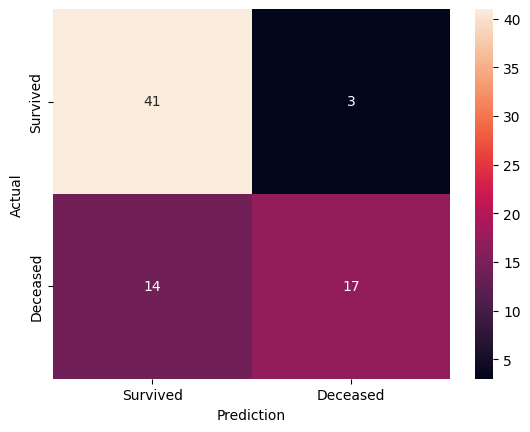

In [26]:
sns.heatmap(cm,annot=True,xticklabels=['Survived', 'Deceased'],
yticklabels=['Survived', 'Deceased'])
plt.xlabel('Prediction')
plt.ylabel('Actual');

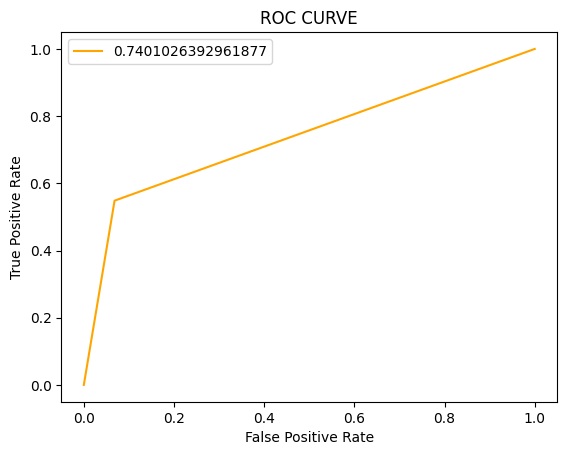

In [27]:
auc_LR = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color = 'orange', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend()
plt.show()

ANN

In [28]:
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
import tensorflow as tf
from keras.metrics import Precision,Recall,F1Score

/Users/harun/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [29]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

#Building model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Model fitting
model.fit(X_train, y_train, epochs=50, batch_size=32)

#Metrics,results
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5)

Epoch 1/50
7/7 [==============================] - 0s 1ms/step - loss: 0.8522 - accuracy: 0.2679
Epoch 2/50
7/7 [==============================] - 0s 966us/step - loss: 0.7949 - accuracy: 0.2679
Epoch 3/50
7/7 [==============================] - 0s 977us/step - loss: 0.7495 - accuracy: 0.3259
Epoch 4/50
7/7 [==============================] - 0s 926us/step - loss: 0.7103 - accuracy: 0.4509
Epoch 5/50
7/7 [==============================] - 0s 914us/step - loss: 0.6740 - accuracy: 0.5759
Epoch 6/50
7/7 [==============================] - 0s 951us/step - loss: 0.6449 - accuracy: 0.6875
Epoch 7/50
7/7 [==============================] - 0s 1ms/step - loss: 0.6144 - accuracy: 0.7277
Epoch 8/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5894 - accuracy: 0.7589
Epoch 9/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5639 - accuracy: 0.7902
Epoch 10/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5388 - accuracy: 0.8036
Epoch 11/50
7/7 [============

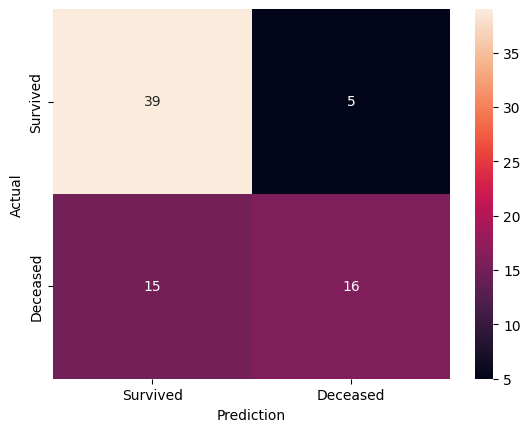

In [30]:
cm = confusion_matrix(y_test,y_pred_binary)
sns.heatmap(cm,annot=True,xticklabels=['Survived', 'Deceased'],
yticklabels=['Survived', 'Deceased'])
plt.xlabel('Prediction')
plt.ylabel('Actual');

In [31]:
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80        44
           1       0.76      0.52      0.62        31

    accuracy                           0.73        75
   macro avg       0.74      0.70      0.71        75
weighted avg       0.74      0.73      0.72        75



In [32]:
# Building different ANN Model with additional layer

model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=50, batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5)

Epoch 1/50
7/7 [==============================] - 0s 1ms/step - loss: 0.6579 - accuracy: 0.7232
Epoch 2/50
7/7 [==============================] - 0s 1ms/step - loss: 0.6395 - accuracy: 0.7098
Epoch 3/50
7/7 [==============================] - 0s 963us/step - loss: 0.6175 - accuracy: 0.7098
Epoch 4/50
7/7 [==============================] - 0s 984us/step - loss: 0.5924 - accuracy: 0.7098
Epoch 5/50
7/7 [==============================] - 0s 971us/step - loss: 0.5660 - accuracy: 0.7098
Epoch 6/50
7/7 [==============================] - 0s 943us/step - loss: 0.5407 - accuracy: 0.7098
Epoch 7/50
7/7 [==============================] - 0s 918us/step - loss: 0.5152 - accuracy: 0.7098
Epoch 8/50
7/7 [==============================] - 0s 974us/step - loss: 0.4933 - accuracy: 0.7098
Epoch 9/50
7/7 [==============================] - 0s 991us/step - loss: 0.4763 - accuracy: 0.7098
Epoch 10/50
7/7 [==============================] - 0s 974us/step - loss: 0.4604 - accuracy: 0.7098
Epoch 11/50
7/7 [======

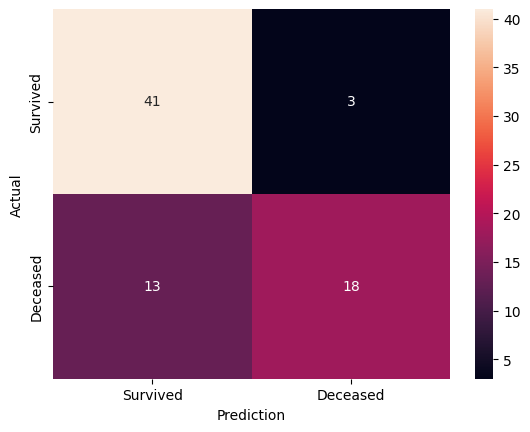

In [33]:
cm = confusion_matrix(y_test,y_pred_binary)
sns.heatmap(cm,annot=True,xticklabels=['Survived', 'Deceased'],
yticklabels=['Survived', 'Deceased'])
plt.xlabel('Prediction')
plt.ylabel('Actual');

In [34]:
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        44
           1       0.86      0.58      0.69        31

    accuracy                           0.79        75
   macro avg       0.81      0.76      0.76        75
weighted avg       0.80      0.79      0.78        75



Epoch 1/15
14/14 [==============================] - 0s 9ms/step - loss: 0.6785 - accuracy: 0.6339 - val_loss: 0.6833 - val_accuracy: 0.5733
Epoch 2/15
14/14 [==============================] - 0s 2ms/step - loss: 0.6290 - accuracy: 0.7411 - val_loss: 0.6551 - val_accuracy: 0.6267
Epoch 3/15
14/14 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.7634 - val_loss: 0.6348 - val_accuracy: 0.6400
Epoch 4/15
14/14 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.7768 - val_loss: 0.6125 - val_accuracy: 0.6400
Epoch 5/15
14/14 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.7991 - val_loss: 0.5991 - val_accuracy: 0.6533
Epoch 6/15
14/14 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.8214 - val_loss: 0.5798 - val_accuracy: 0.6667
Epoch 7/15
14/14 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8438 - val_loss: 0.5628 - val_accuracy: 0.7067
Epoch 8/15
14/14 [==

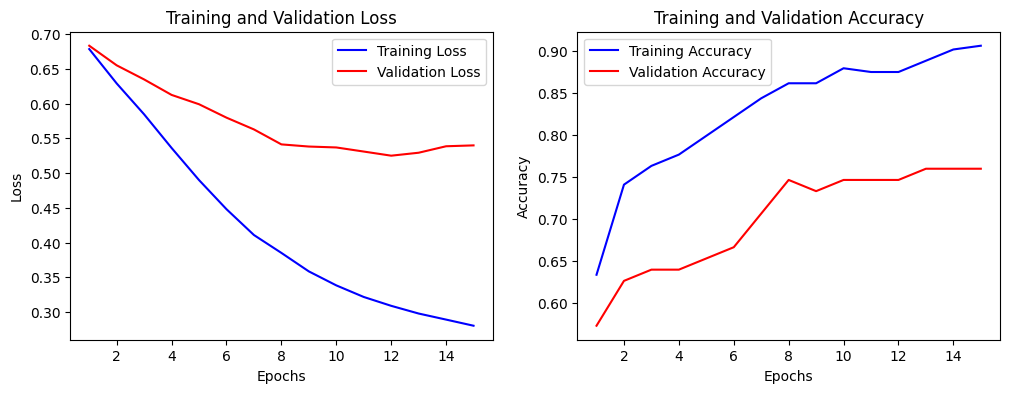

In [35]:
# History of Model

model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# To save model's history creating a record

history = model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_test, y_test))

# Logging Loss info
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Metrics
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Training prosses chart
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

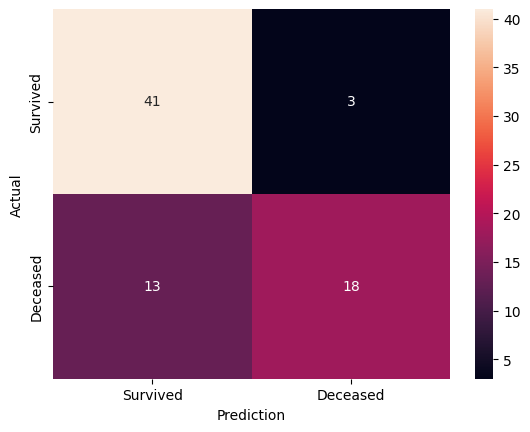

In [36]:
cm = confusion_matrix(y_test,y_pred_binary)
sns.heatmap(cm,annot=True,xticklabels=['Survived', 'Deceased'],
yticklabels=['Survived', 'Deceased'])
plt.xlabel('Prediction')
plt.ylabel('Actual');

Epoch 1/20
14/14 [==============================] - 0s 8ms/step - loss: 0.6620 - accuracy: 0.6161 - val_loss: 0.6637 - val_accuracy: 0.5867
Epoch 2/20
14/14 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.6964 - val_loss: 0.6403 - val_accuracy: 0.6267
Epoch 3/20
14/14 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.7500 - val_loss: 0.6213 - val_accuracy: 0.6400
Epoch 4/20
14/14 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.7589 - val_loss: 0.6035 - val_accuracy: 0.6800
Epoch 5/20
14/14 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7679 - val_loss: 0.5892 - val_accuracy: 0.6800
Epoch 6/20
14/14 [==============================] - 0s 2ms/step - loss: 0.4901 - accuracy: 0.7812 - val_loss: 0.5762 - val_accuracy: 0.6933
Epoch 7/20
14/14 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.8036 - val_loss: 0.5622 - val_accuracy: 0.7467
Epoch 8/20
14/14 [==

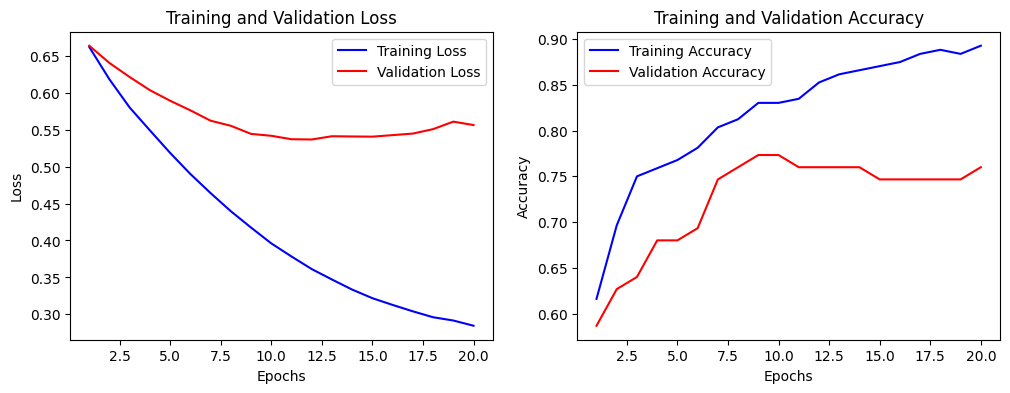

In [37]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
